### Import Libraries 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [3]:
data20 = pd.read_csv('data/om-2020.csv', delimiter=",", skiprows=3)
data21 = pd.read_csv('data/om-2021.csv', delimiter=",", skiprows=3 )
data22 = pd.read_csv('data/om-2022.csv', delimiter=",", skiprows=3)
data23 = pd.read_csv('data/om-2023.csv', delimiter=",", skiprows=3)
data24 = pd.read_csv('data/om-2024.csv', delimiter=",", skiprows=3)

### Functions 

In [4]:
weather_columns = {
    'temperature_2m (°C)': 'temp',
    'weather_code (wmo code)': 'weather_code',
    'precipitation (mm)': 'precip',
    'cloud_cover (%)': 'cloud_cover',
    'wind_speed_10m (km/h)': 'wind_speed',
    'sunshine_duration (s)': 'sunshine',    
}



In [5]:
def add_time_columns(df):
    constant_year = 2000
    df['time'] = pd.to_datetime(df['time'])
    df['month'] = df['time'].dt.month
    df['day'] = df['time'].dt.day
    df['year'] = df['time'].dt.year
    df['minute'] = df['time'].dt.minute
    df['second'] = df['time'].dt.second
    df['hour'] = df['time'].dt.hour
    df['month_day_time'] = pd.to_datetime(
        df['month'].astype(str) + '-' +
        df['day'].astype(str) + '-' +
        str(constant_year) + ' ' +
        df['hour'].astype(str).str.zfill(2) + ':' +
        df['minute'].astype(str).str.zfill(2) + ':' +
        df['second'].astype(str).str.zfill(2),  format='%m-%d-%Y %H:%M:%S')
    return df

def rename_columns(df):
    df.rename(columns=weather_columns, inplace=True)
    return df



In [6]:
all_data = pd.concat([data20, data21, data22, data23, data24])

In [7]:
add_time_columns(all_data)
rename_columns(all_data)

add_time_columns(data20)
rename_columns(data20)

add_time_columns(data21)
rename_columns(data21)

add_time_columns(data22)
rename_columns(data22)

add_time_columns(data23)
rename_columns(data23)

add_time_columns(data24)
rename_columns(data24)



,time,temp,weather_code,cloud_cover,precip,wind_speed,sunshine,month,day,year,minute,second,hour,month_day_time
0,2024-01-01 00:00:00,8.4,3,100,0.0,31.1,0.0,1,1,2024,0,0,0,2000-01-01 00:00:00
1,2024-01-01 01:00:00,6.7,53,100,0.7,30.0,0.0,1,1,2024,0,0,1,2000-01-01 01:00:00
2,2024-01-01 02:00:00,6.2,61,95,1.3,27.7,0.0,1,1,2024,0,0,2,2000-01-01 02:00:00
3,2024-01-01 03:00:00,6.3,53,96,0.9,28.3,0.0,1,1,2024,0,0,3,2000-01-01 03:00:00
4,2024-01-01 04:00:00,7.0,3,100,0.0,28.8,0.0,1,1,2024,0,0,4,2000-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31 19:00:00,3.9,3,100,0.0,23.5,0.0,12,31,2024,0,0,19,2000-12-31 19:00:00
8780,2024-12-31 20:00:00,4.9,3,100,0.0,24.0,0.0,12,31,2024,0,0,20,2000-12-31 20:00:00
8781,2024-12-31 21:00:00,5.4,3,100,0.0,24.6,0.0,12,31,2024,0,0,21,2000-12-31 21:00:00
8782,2024-12-31 22:00:00,5.8,3,100,0.0,24.1,0.0,12,31,2024,0,0,22,2000-12-31 22:00:00


In [8]:
# checking for null values
all_data.isnull().values.any()

np.False_

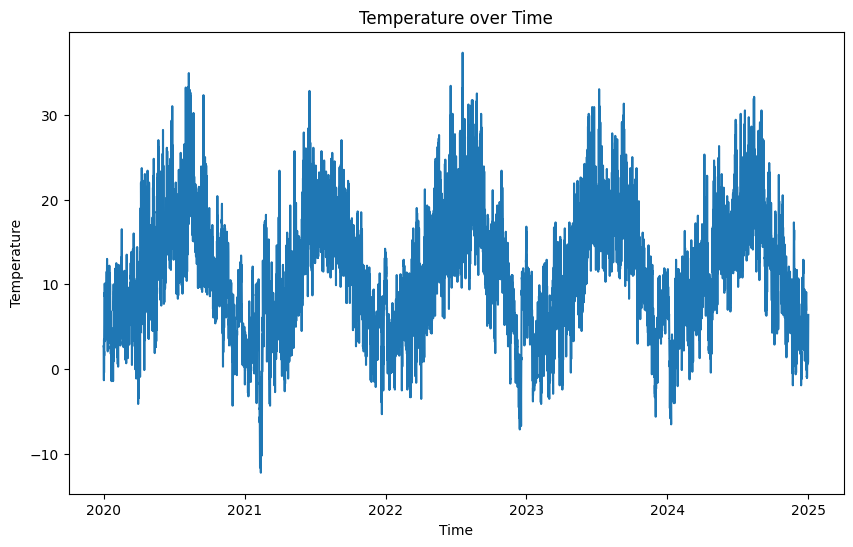

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(all_data['time'], all_data['temp'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature over Time')
plt.show()


In [11]:
january_data20 = data20[data20['month'] == 1]
january_data21 = data21[data21['month'] == 1]
january_data22 = data22[data22['month'] == 1]
january_data23 = data23[data23['month'] == 1]
january_data24 = data24[data24['month'] == 1]


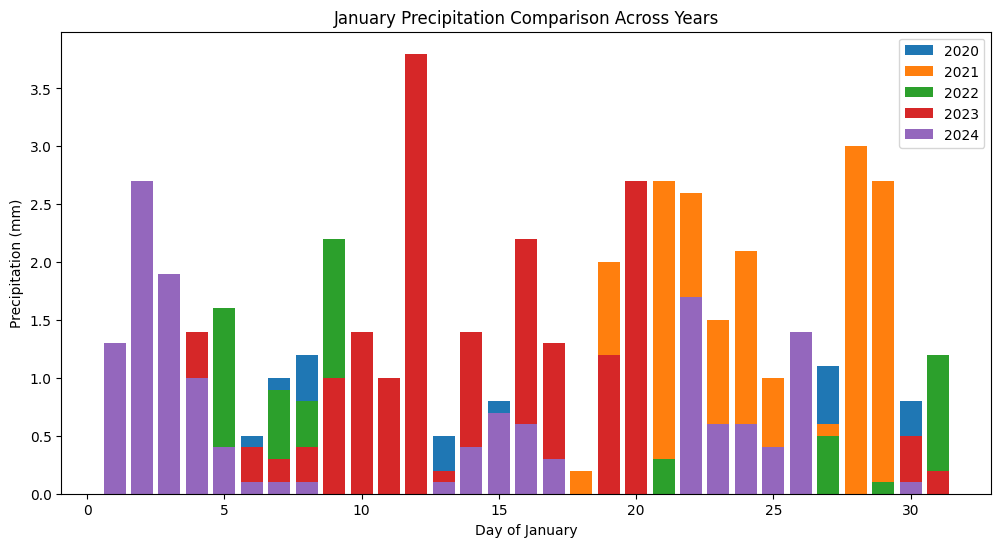

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(january_data20['day'], january_data20['precip'], label='2020')
plt.bar(january_data21['day'], january_data21['precip'], label='2021')
plt.bar(january_data22['day'], january_data22['precip'], label='2022')
plt.bar(january_data23['day'], january_data23['precip'], label='2023')
plt.bar(january_data24['day'], january_data24['precip'], label='2024')

plt.xlabel('Day of January')
plt.ylabel('Precipitation (mm)')
plt.title('January Precipitation Comparison Across Years')
plt.legend()
plt.show()

In [13]:
january20_01_01 = january_data20[january_data20['day'] == 1]
january21_01_01 = january_data21[january_data21['day'] == 1]
january22_01_01 = january_data22[january_data22['day'] == 1]
january23_01_01 = january_data23[january_data23['day'] == 1]
january24_01_01 = january_data24[january_data24['day'] == 1]


january20_01_01.head()

,time,temp,weather_code,cloud_cover,precip,wind_speed,sunshine,month,day,year,minute,second,hour,month_day_time
0,2020-01-01 00:00:00,2.7,2,59,0.0,9.5,0.0,1,1,2020,0,0,0,2000-01-01 00:00:00
1,2020-01-01 01:00:00,2.8,1,39,0.0,8.8,0.0,1,1,2020,0,0,1,2000-01-01 01:00:00
2,2020-01-01 02:00:00,1.7,0,14,0.0,8.6,0.0,1,1,2020,0,0,2,2000-01-01 02:00:00
3,2020-01-01 03:00:00,1.1,0,14,0.0,9.3,0.0,1,1,2020,0,0,3,2000-01-01 03:00:00
4,2020-01-01 04:00:00,0.6,0,18,0.0,8.9,0.0,1,1,2020,0,0,4,2000-01-01 04:00:00


In [14]:
january_data21.describe()

,time,temp,weather_code,cloud_cover,precip,wind_speed,sunshine,month,day,year,minute,second,hour,month_day_time
count,744,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.0,744.000000,744.0,744.0,744.0,744.000000,744
mean,2021-01-16 11:29:59.999999744,2.930645,20.447581,87.229839,0.140323,14.319086,425.881169,1.0,16.000000,2021.0,0.0,0.0,11.500000,2000-01-16 11:30:00
min,2021-01-01 00:00:00,-4.000000,0.000000,0.000000,0.000000,1.300000,0.000000,1.0,1.000000,2021.0,0.0,0.0,0.000000,2000-01-01 00:00:00
25%,2021-01-08 17:45:00,1.075000,3.000000,89.000000,0.000000,9.700000,0.000000,1.0,8.000000,2021.0,0.0,0.0,5.750000,2000-01-08 17:45:00
50%,2021-01-16 11:30:00,2.300000,3.000000,100.000000,0.000000,13.650000,0.000000,1.0,16.000000,2021.0,0.0,0.0,11.500000,2000-01-16 11:30:00
75%,2021-01-24 05:15:00,4.600000,51.000000,100.000000,0.100000,17.200000,0.000000,1.0,24.000000,2021.0,0.0,0.0,17.250000,2000-01-24 05:15:00
max,2021-01-31 23:00:00,12.100000,75.000000,100.000000,3.000000,43.600000,3600.000000,1.0,31.000000,2021.0,0.0,0.0,23.000000,2000-01-31 23:00:00
std,NaN,2.873324,25.759211,24.720665,0.378298,6.608163,1104.358140,0.0,8.950289,0.0,0.0,0.0,6.926843,NaN


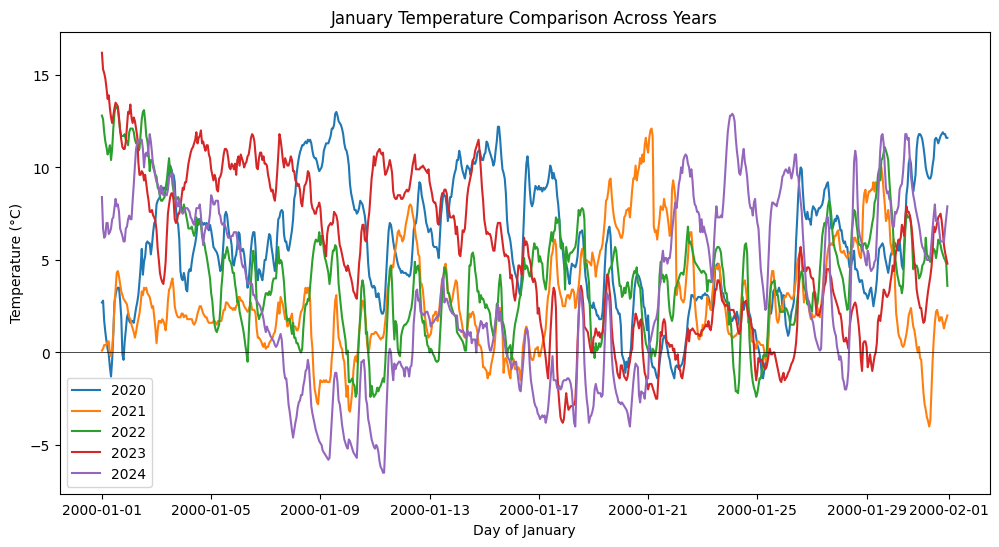

In [15]:

plt.figure(figsize=(12, 6))

plt.plot(january_data20['month_day_time'], january_data20['temp'], label='2020')
plt.plot(january_data21['month_day_time'], january_data21['temp'], label='2021')
plt.plot(january_data22['month_day_time'], january_data22['temp'], label='2022')
plt.plot(january_data23['month_day_time'], january_data23['temp'], label='2023')
plt.plot(january_data24['month_day_time'], january_data24['temp'], label='2024')
plt.axhline(y=0, color='black', linewidth=0.5)

# 
plt.xlabel('Day of January')
plt.ylabel('Temperature (°C)')
plt.title('January Temperature Comparison Across Years')
plt.legend()
plt.show()


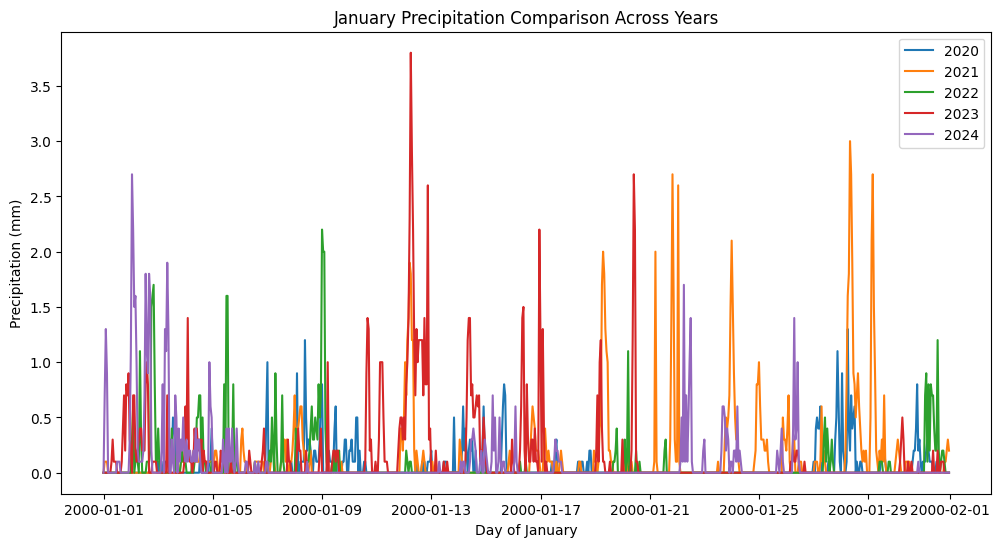

In [16]:

plt.figure(figsize=(12, 6))

plt.plot(january_data20['month_day_time'], january_data20['precip'], label='2020')
plt.plot(january_data21['month_day_time'], january_data21['precip'], label='2021')
plt.plot(january_data22['month_day_time'], january_data22['precip'], label='2022')
plt.plot(january_data23['month_day_time'], january_data23['precip'], label='2023')
plt.plot(january_data24['month_day_time'], january_data24['precip'], label='2024')

plt.xlabel('Day of January')
plt.ylabel('Precipitation (mm)')
plt.title('January Precipitation Comparison Across Years')
plt.legend()
plt.show()
